In [1]:
'''train_files = [
    "One-Hot/Train_Orig_OH.csv",
    "One-Hot/Scaled/Train_Scaled_All_OH.csv",
    "One-Hot/Scaled/Train_Scaled_Cont_OH.csv",
    "One-Hot/MinMax/Train_MM_OH.csv",
    "One-Hot/MinMax/train_OH_MM_PCA15.csv",
    "One-Hot/MinMax/train_OH_MM_PCA20.csv",
    "One-Hot/MinMax/train_OH_MM_PCA25.csv",
    "One-Hot/MinMax/train_OH_MM_PCA30.csv",
    "One-Hot/MinMax/train_OH_MM_PCA35.csv",
    "IntClasses/Train_Orig_Int.csv",
    "IntClasses/Scaled/Train_Scaled_All_Int.csv",
    "IntClasses/Scaled/Train_Scaled_Cont_Int.csv",
    "IntClasses/MinMax/Train_MM_Int.csv",
    "IntClasses/MinMax/train_Int_MM_PCA10.csv",
    "IntClasses/MinMax/train_Int_MM_PCA15.csv",
    "IntClasses/MinMax/train_Int_MM_PCA20.csv",
    "IntClasses/MinMax/train_Int_MM_PCA25.csv",
]'''

'train_files = [\n    "One-Hot/Train_Orig_OH.csv",\n    "One-Hot/Scaled/Train_Scaled_All_OH.csv",\n    "One-Hot/Scaled/Train_Scaled_Cont_OH.csv",\n    "One-Hot/MinMax/Train_MM_OH.csv",\n    "One-Hot/MinMax/train_OH_MM_PCA15.csv",\n    "One-Hot/MinMax/train_OH_MM_PCA20.csv",\n    "One-Hot/MinMax/train_OH_MM_PCA25.csv",\n    "One-Hot/MinMax/train_OH_MM_PCA30.csv",\n    "One-Hot/MinMax/train_OH_MM_PCA35.csv",\n    "IntClasses/Train_Orig_Int.csv",\n    "IntClasses/Scaled/Train_Scaled_All_Int.csv",\n    "IntClasses/Scaled/Train_Scaled_Cont_Int.csv",\n    "IntClasses/MinMax/Train_MM_Int.csv",\n    "IntClasses/MinMax/train_Int_MM_PCA10.csv",\n    "IntClasses/MinMax/train_Int_MM_PCA15.csv",\n    "IntClasses/MinMax/train_Int_MM_PCA20.csv",\n    "IntClasses/MinMax/train_Int_MM_PCA25.csv",\n]'

In [2]:
train_files = [
    "One-Hot/Scaled/Train_Scaled_Cont_OH.csv",
    "One-Hot/MinMax/Train_MM_OH.csv",
    "One-Hot/MinMax/train_OH_MM_PCA15.csv",
    "One-Hot/MinMax/train_OH_MM_PCA20.csv",
    "One-Hot/MinMax/train_OH_MM_PCA25.csv",
    "One-Hot/MinMax/train_OH_MM_PCA30.csv",
    "One-Hot/MinMax/train_OH_MM_PCA35.csv",
    "IntClasses/Scaled/Train_Scaled_Cont_Int.csv",
    "IntClasses/MinMax/Train_MM_Int.csv",
    "IntClasses/MinMax/train_Int_MM_PCA10.csv",
    "IntClasses/MinMax/train_Int_MM_PCA15.csv",
    "IntClasses/MinMax/train_Int_MM_PCA20.csv",
    "IntClasses/MinMax/train_Int_MM_PCA25.csv",
]


Processing dataset: One-Hot/Scaled/Train_Scaled_Cont_OH.csv


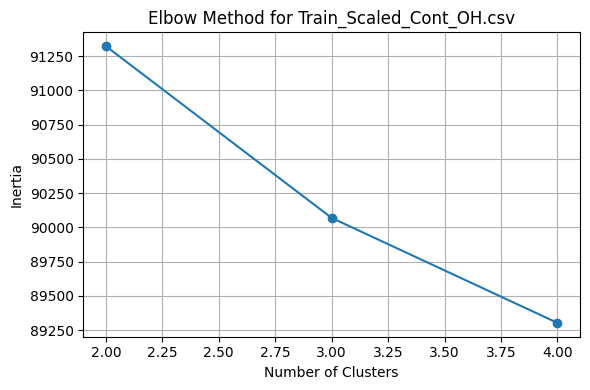

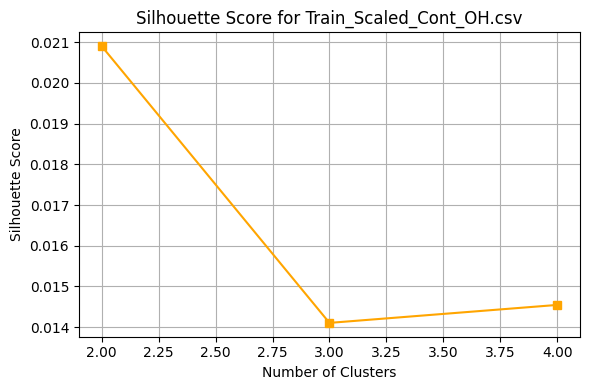

Best K (Silhouette): 2


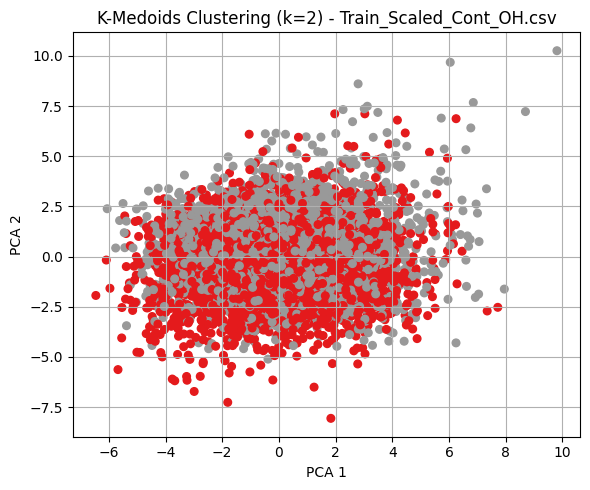


Processing dataset: One-Hot/MinMax/Train_MM_OH.csv


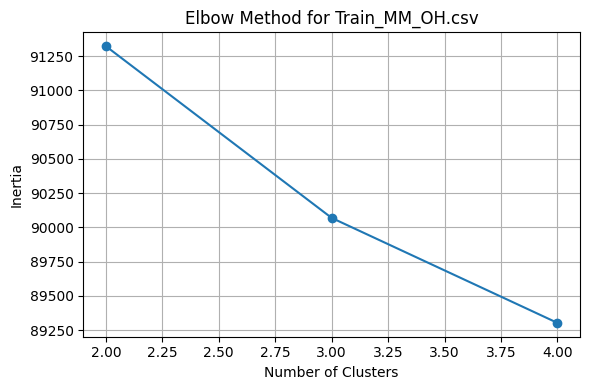

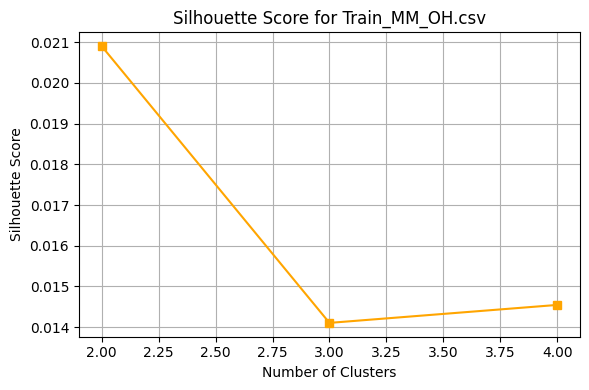

Best K (Silhouette): 2


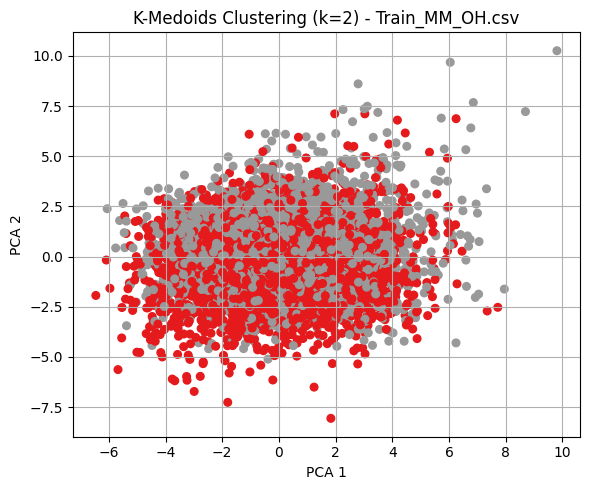


Processing dataset: One-Hot/MinMax/train_OH_MM_PCA15.csv


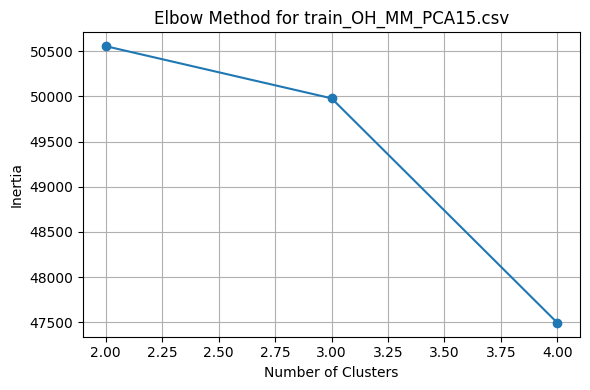

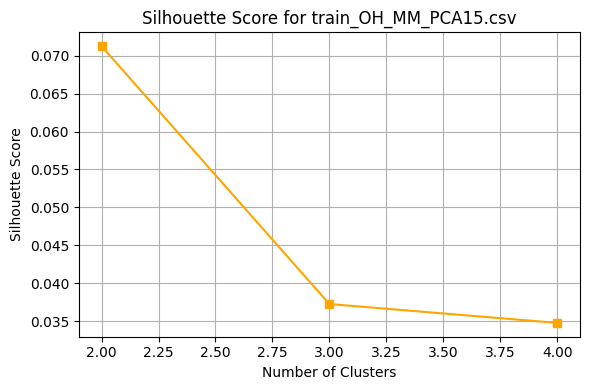

Best K (Silhouette): 2


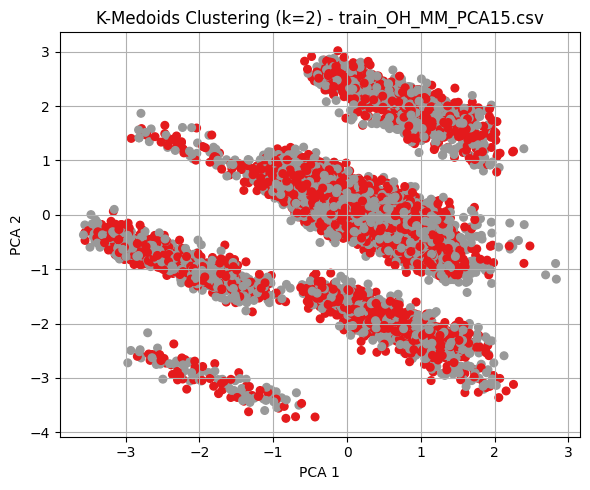


Processing dataset: One-Hot/MinMax/train_OH_MM_PCA20.csv


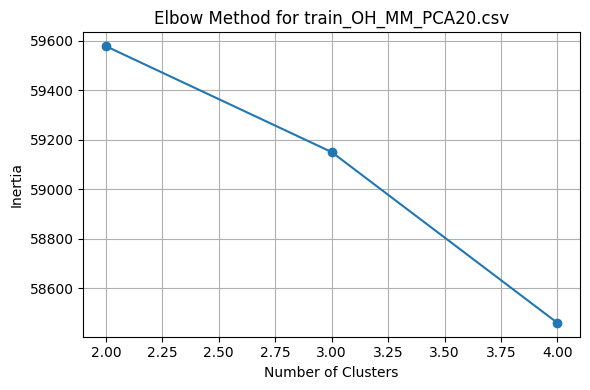

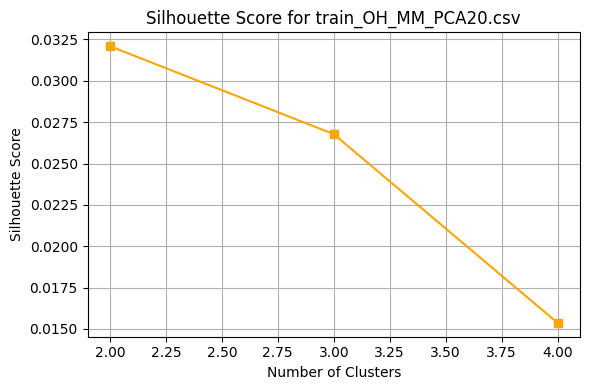

Best K (Silhouette): 2


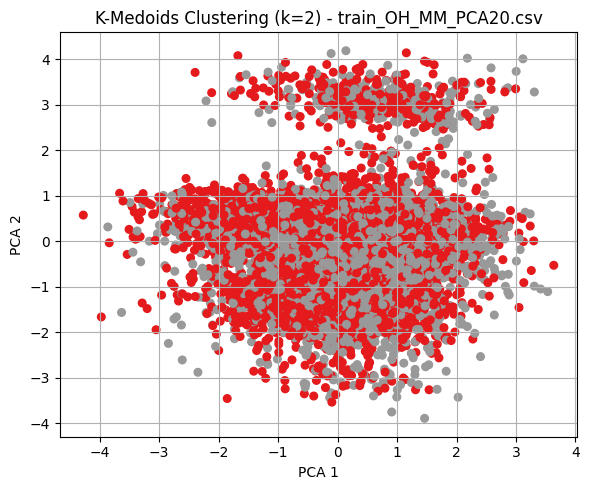


Processing dataset: One-Hot/MinMax/train_OH_MM_PCA25.csv


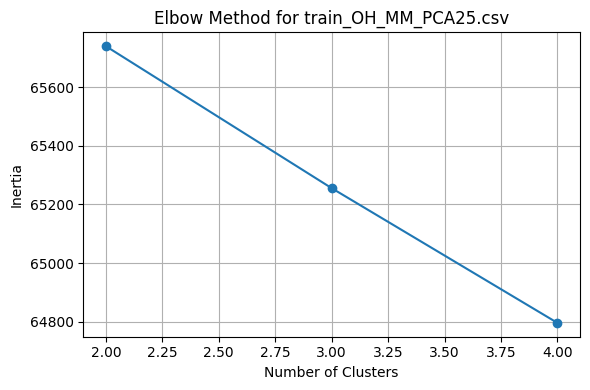

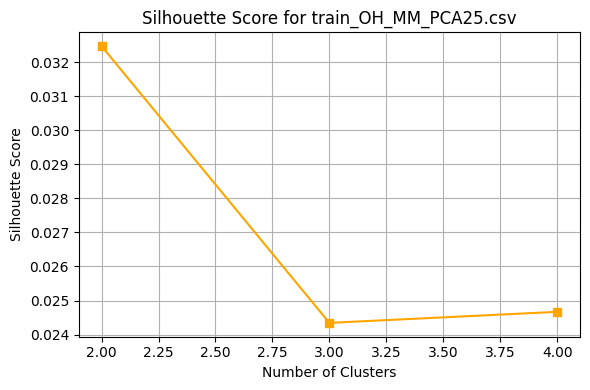

Best K (Silhouette): 2


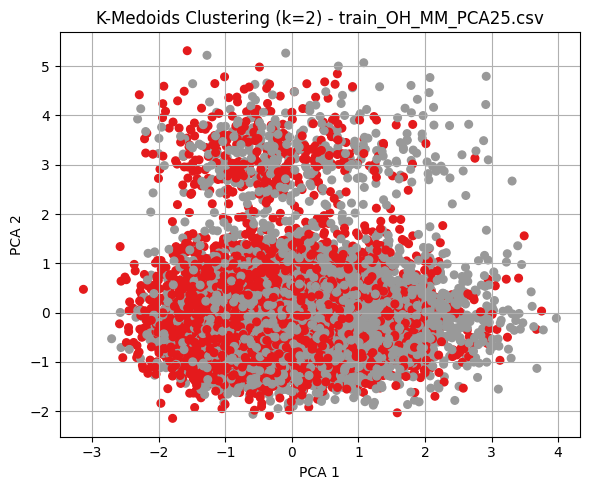


Processing dataset: One-Hot/MinMax/train_OH_MM_PCA30.csv


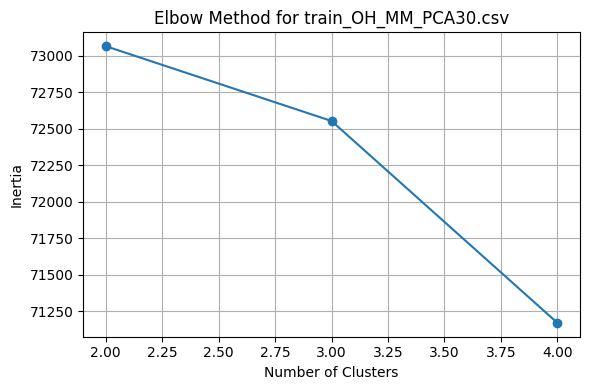

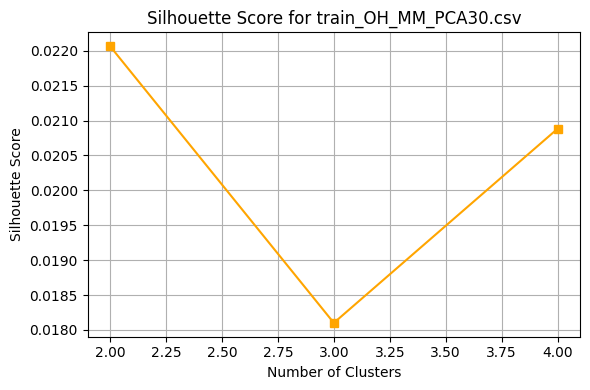

Best K (Silhouette): 2


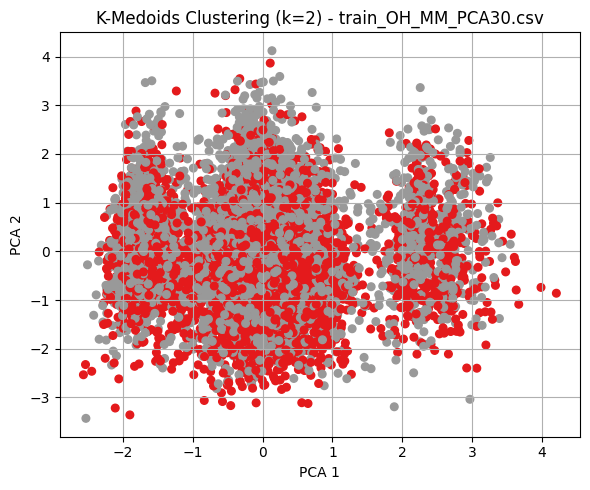


Processing dataset: One-Hot/MinMax/train_OH_MM_PCA35.csv


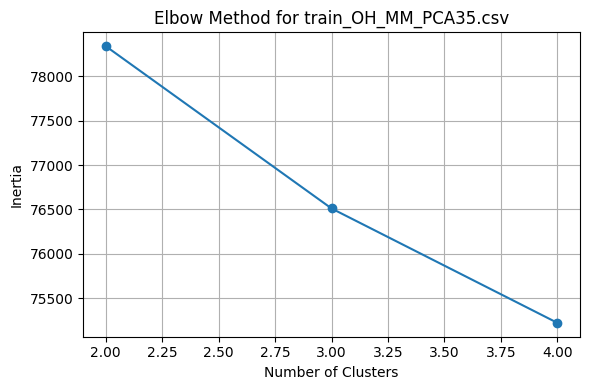

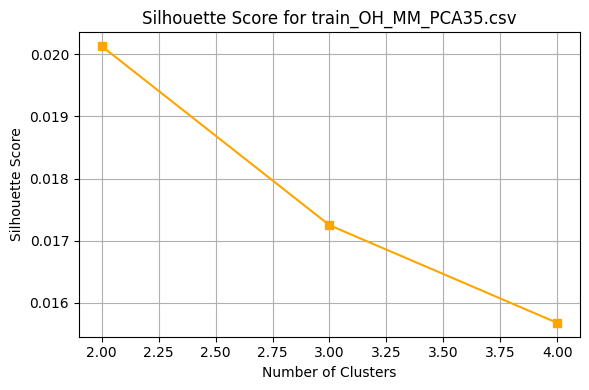

Best K (Silhouette): 2


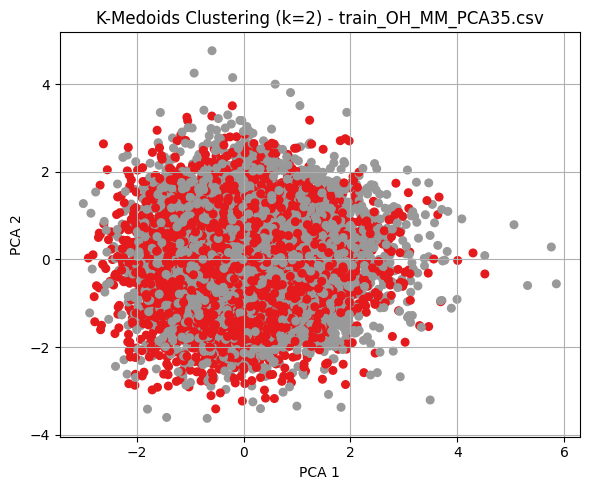


Processing dataset: IntClasses/Scaled/Train_Scaled_Cont_Int.csv


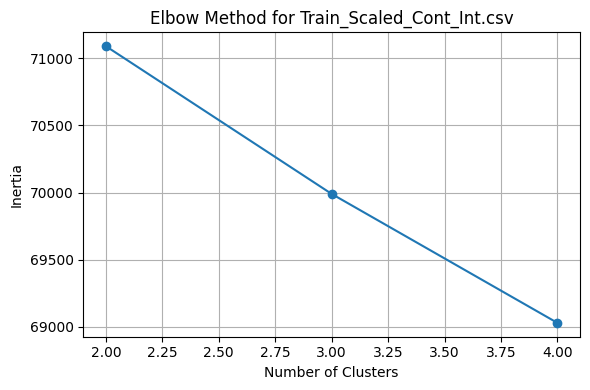

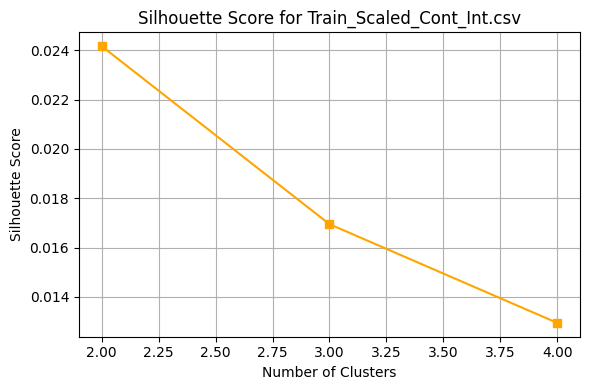

Best K (Silhouette): 2


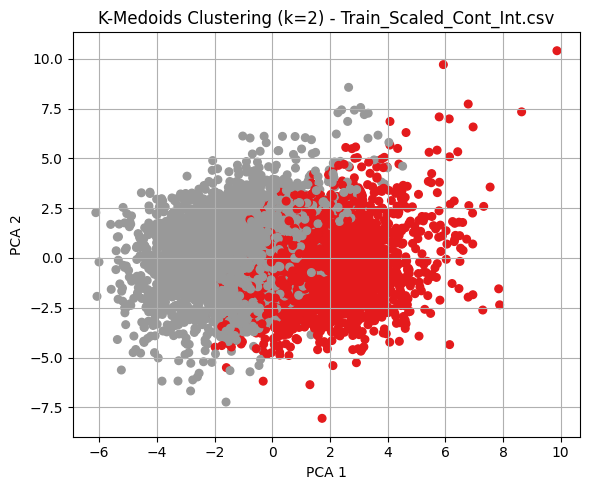


Processing dataset: IntClasses/MinMax/Train_MM_Int.csv


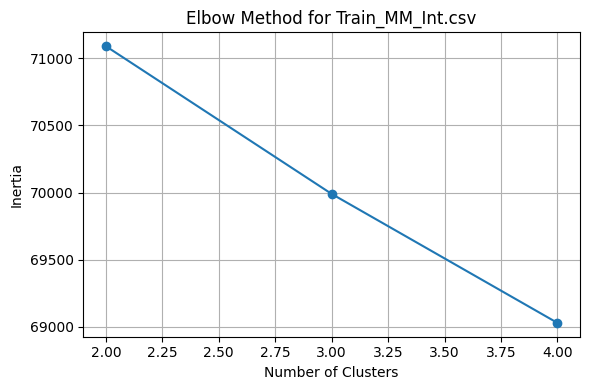

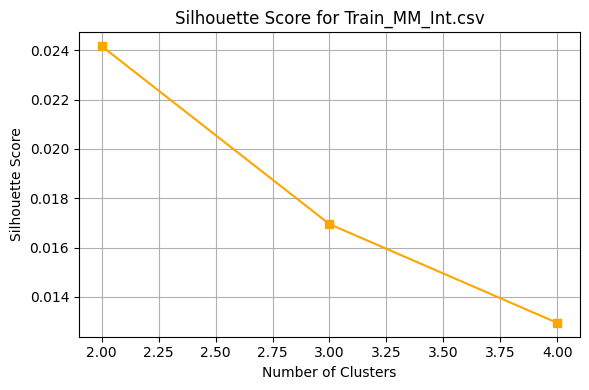

Best K (Silhouette): 2


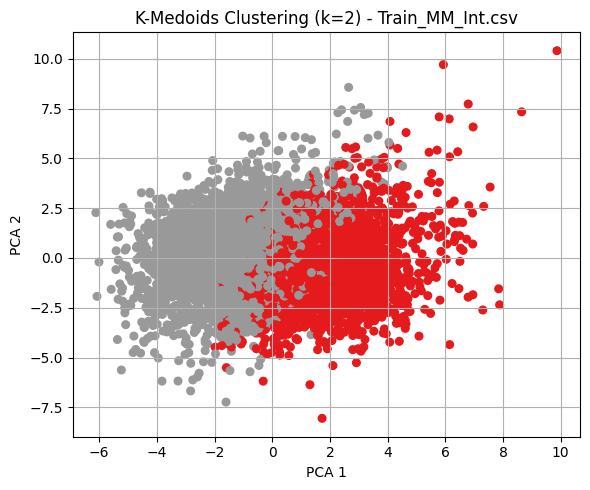


Processing dataset: IntClasses/MinMax/train_Int_MM_PCA10.csv


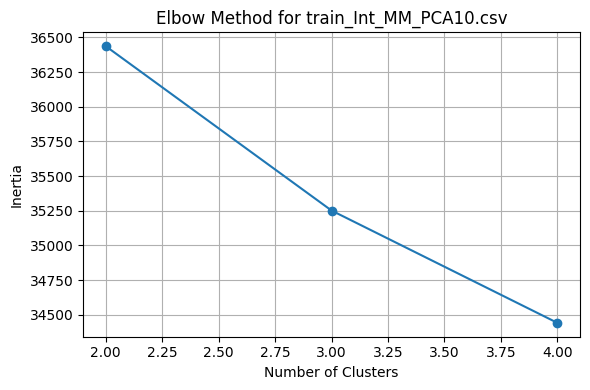

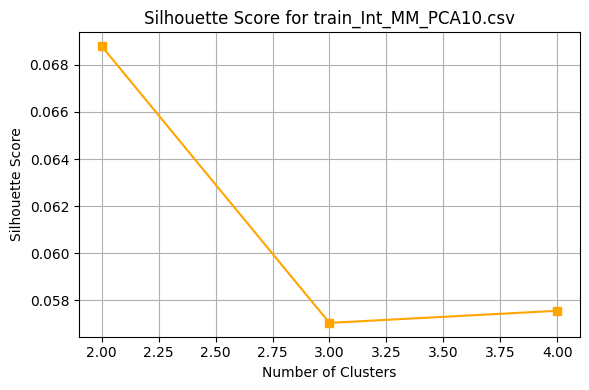

Best K (Silhouette): 2


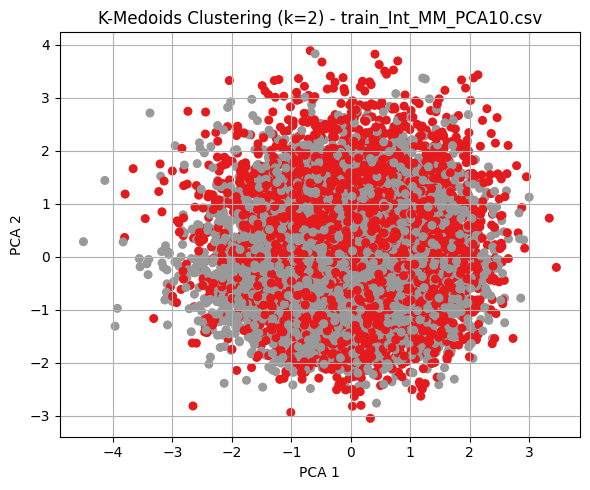


Processing dataset: IntClasses/MinMax/train_Int_MM_PCA15.csv


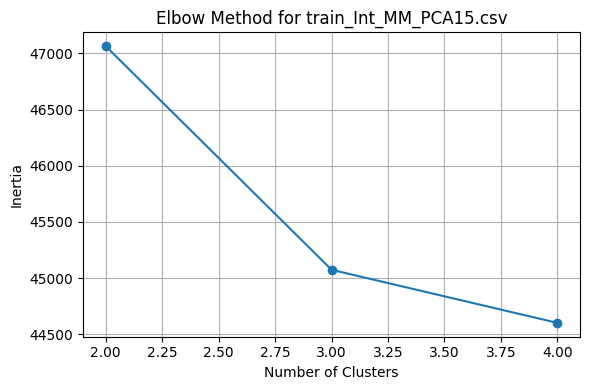

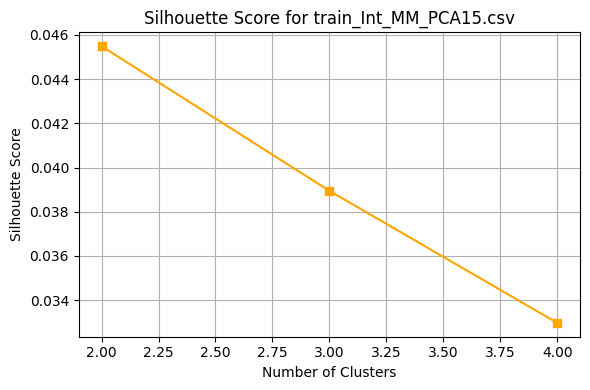

Best K (Silhouette): 2


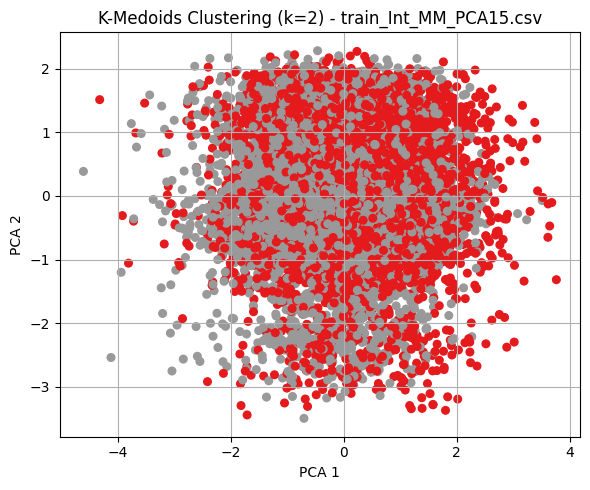


Processing dataset: IntClasses/MinMax/train_Int_MM_PCA20.csv


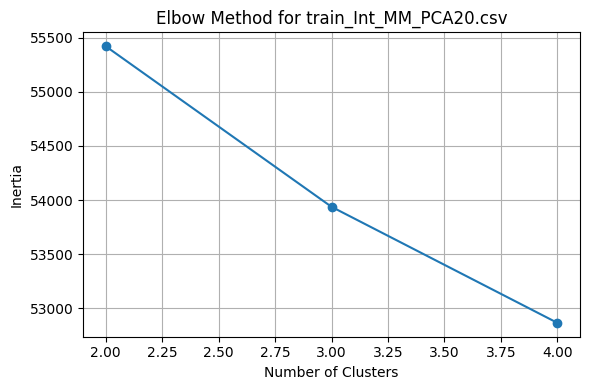

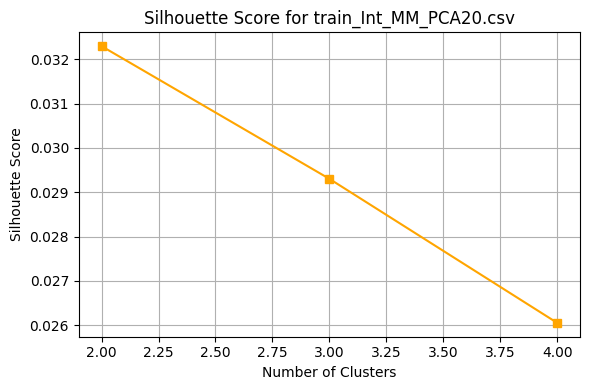

Best K (Silhouette): 2


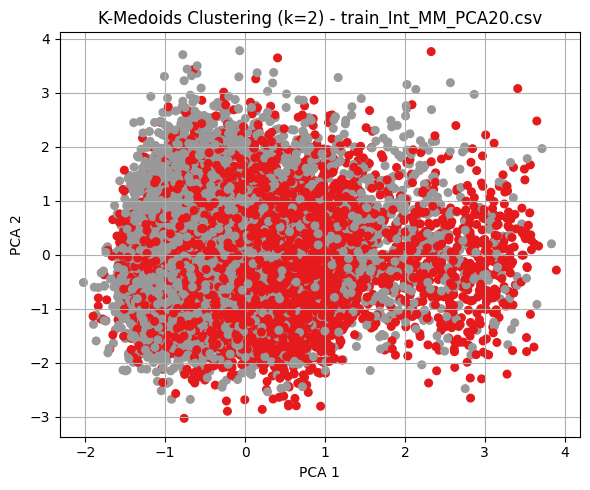


Processing dataset: IntClasses/MinMax/train_Int_MM_PCA25.csv


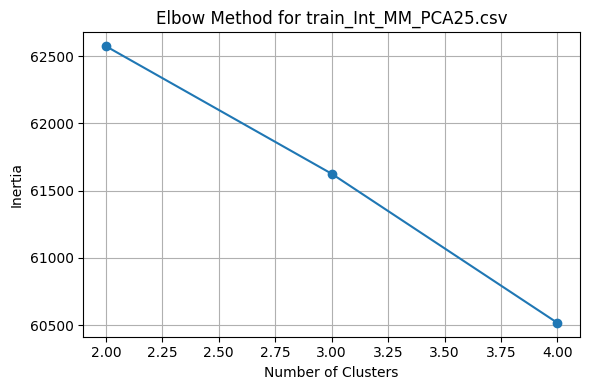

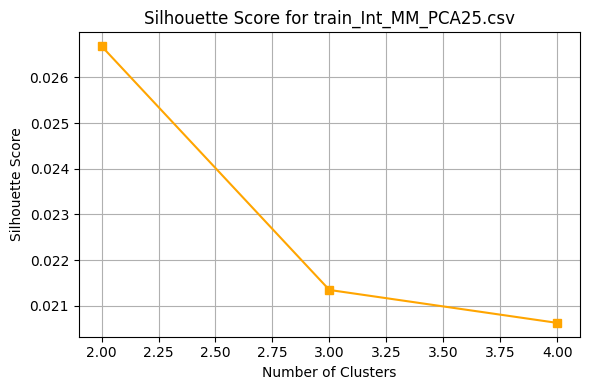

Best K (Silhouette): 2


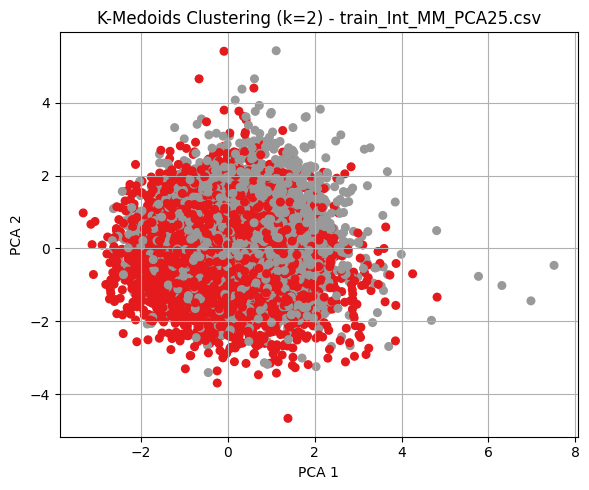

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA



results = []

for path in train_files:
    print("\n" + "="*80)
    print(f"Processing dataset: {path}")

    # Load dataset
    df = pd.read_csv(path)

    # Drop target columns
    if 'LoanApproved' in df.columns:
        df.drop(columns=['LoanApproved'], inplace=True)
    if 'RiskScore' in df.columns:
        df.drop(columns=['RiskScore'], inplace=True)

    # Scale data
    X = StandardScaler().fit_transform(df)

    # Elbow Method & Silhouette Scores
    inertias = []
    silhouettes = []
    k_range = [2, 3, 4]

    for k in k_range:
        kmedoids = KMedoids(n_clusters=k, random_state=42, method='alternate')
        kmedoids.fit(X)
        inertias.append(kmedoids.inertia_)
        silhouettes.append(silhouette_score(X, kmedoids.labels_))

    # Plot Elbow
    plt.figure(figsize=(6, 4))
    plt.plot(k_range, inertias, marker='o')
    plt.title(f"Elbow Method for {os.path.basename(path)}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Silhouette
    plt.figure(figsize=(6, 4))
    plt.plot(k_range, silhouettes, marker='s', color='orange')
    plt.title(f"Silhouette Score for {os.path.basename(path)}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Choose best k based on silhouette score
    best_k = k_range[np.argmax(silhouettes)]
    print(f"Best K (Silhouette): {best_k}")

    # Final K-Medoids clustering
    final_model = KMedoids(n_clusters=best_k, random_state=42, method='pam')
    labels = final_model.fit_predict(X)

    # Optional: Visualize in 2D (PCA projection)
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    plt.figure(figsize=(6, 5))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='Set1', s=30)
    plt.title(f"K-Medoids Clustering (k={best_k}) - {os.path.basename(path)}")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Save clustering result summary
    results.append({
        "Dataset": os.path.basename(path),
        "Best_K": best_k,
        "Silhouette": max(silhouettes),
        "Inertia": final_model.inertia_
    })




In [5]:
# Show summary
pd.DataFrame(results)

,Dataset,Best_K,Silhouette,Inertia
0,Train_Scaled_Cont_OH.csv,2,0.020905,91323.673402
1,Train_MM_OH.csv,2,0.020905,91323.673402
2,train_OH_MM_PCA15.csv,2,0.071245,48832.189519
3,train_OH_MM_PCA20.csv,2,0.032095,57938.435981
4,train_OH_MM_PCA25.csv,2,0.032465,64564.495058
5,train_OH_MM_PCA30.csv,2,0.022067,71582.557634
6,train_OH_MM_PCA35.csv,2,0.020132,77578.418111
7,Train_Scaled_Cont_Int.csv,2,0.024165,70411.072568
8,Train_MM_Int.csv,2,0.024165,70411.072568
9,train_Int_MM_PCA10.csv,2,0.068794,36153.897856
